# How long would it take to fall through the Earth?

## Learning Objectives

The student will be able to:
- Apply the Shell-Theorem to find forces within a non-uniform body
- Use the Euler-Cromer method to calculate movement under the effect of a varying gravity
- Interpret plots of position/velocity/acceleration/mass and identify the connections between them
    - Justify the different behaviour of graphs in terms of the chaning property of the Earth

## Gravity inside the Earth

What would happen if the ground under you disappeared and you fell all the way to the center of the Earth? What if someone somehow made a tunnel from the surface to the core? How fast would you go along the way? How long would it take to fall all the way through?

To anwser these questions, you will need to understand the effects of gravity inside of the Earth.

In [4]:
import numpy as np #Used for mathematical functions and constants
import matplotlib.pyplot as plt #Used for plotting

### Gravity

The gravitational force between two objects is given by $F = \frac{GMm}{r^2}$

where G is the gravitational constant $6.68\times10^-11\frac{Nm^2}{kg^2}$, M is the mass of one of the objects, m is the mass of the other object and r is the distance between the objects. The force acts on both of the objects, and is pointed from one object to the other. Furthermore, Newtons second law gives us that:

$$
\begin{align*}
F = ma \Rightarrow a = \frac{F}{m} = \frac{GMm}{r^2m} = \frac{GM}{r^2}
\end{align*}
$$

This means that the gravitational acceleration at any given time is dependant only on the mass of the object pulling on you, and your distance to it.

**EXCERCISE 1:**

**a)**
Write the function **gravAccel(totalmass, position)** that takes the mass of the object exerting the gravitational force, and the position relative to it as parameters, and returns the resultant gravitational **acceleration**.

**b)**
Make the function take the direction of the force into account. A positive position corresponds to being above the object, and a negative position corresponds to being below the object.

In [5]:
G = 6.674e-11 #The gravitational constant

def gravAccel(mass, pos):
    if pos == 0: #Making sure I'm not dividing by zero
        return 0
    return -G * mass / (abs(pos)**3) * pos

### The Shell Theorem

The main difference between being affected by gravity while outside the Earth, and being affected while inside it, is how much of it is below you to "pull you down". As you venture further down, less of the Earth will be below you to pull you down, and more of it will be above you to pull you up. In addition to this, as you get closer to different parts of the Earth, they will have a greater pull on you due to being closer to you.

If we assume the Earth is perfectly spherical, the sum of these effects are described by the [Shell Theorem](http://hyperphysics.phy-astr.gsu.edu/hbase/Mechanics/sphshell2.html), which makes this problem much simpler. The Shell Theorem has the following implications for our problem:

- A spherically symmetric body affects external objects gravitationally as though all of its mass were concentrated at a point at its centre
- When at a distance r from the center, all mass at a greater distance than r can be ignored

This means that we do not have to calculate the gravitational pull from all throughout the Earth, since we can act as if all of the Earth's mass is located in its center. We also only need to worry about the what is further in than the point you are currently at.

<img src="https://raw.githubusercontent.com/KarlHenrik/Jupyter-Book-Showroom/master/content/features/activities/FallingThroughTheEarth/ShellTheorem.jpg" alt="Drawing" style="width: 70%;"/>

## Falling through a uniform Earth

To start with, assume that the Earth has a constant density (a uniform Earth). This will make the problem easier to solve, and will make for a good foundation for later, when you will look at falling through a non-uniform Earth.

### Finding gravitational acceleration inside of a uniform Earth

**EXERCISE 2:**

Find the Earth's total mass and radius online, and use this to calculate the density of a uniform Earth.

In [6]:
earthMass = 5.972 * 10**24 #kg
earthRadius = 6.371 * 10**6 #m

earthVolume = 4/3 * np.pi * earthRadius**3

uniDensity = earthMass/earthVolume

**EXERCISE 3:**

Using the density you found in the previous exercise, write the function **sphereMass(distance)** that takes the distance from the center of the Earth as an argument, and returns the mass of a sphere with that distance as radius, and with the same density as the uniform Earth. *(This sphere will be the equivelant of the red area in the figure above.)*

In [7]:
def sphereMass(distance):
    return 4/3 * np.pi * distance**3 * uniDensity

**EXERCISE 4:**

Using the **gravAccel** function, the **sphereMass** function, and the implications of the Shell Theorem, write the function **uniformGravityAccel(position)** that calculates the gravitational acceleration at any position relative to the center of a uniform Earth.

In [8]:
def uniformGravityAccel(pos):
    return gravAccel(sphereMass(abs(pos)), pos)

## Calculating the fall through a uniform Earth

To calculate the movement through a uniform Earth, you will need to define some paramaters and some lists or arrays to save your results in. Then you will need to use the Euler-Cromer method to calculate the movement step by step.

A quick refresher on the structure of the Euler-Cromer method:

    for i in range(n-1):
        acceleration[i] = function(arguments)
        velocity[i+1] = velocity[i] + acceleration[i] * dt
        position[i+1] = position[i] + velocity[i+1] * dt

## The Euler-Cromer loop

**EXERCISE 5:**

**a)**
Define the lists or arrays that will hold the positions, velocities and accelerations at any given time during the fall. Use a time step of 1 second, and 5000 iterations in your loop.

**b)**
Make the starting distance from the center equal to the radius of the Earth, and make the starting velocity 0 m/s.

**c)**
Define a list or array that holds all of the different times.

In [9]:
n = 5000
dt = 1

acceleration = np.zeros(n)
velocity = np.zeros(n)
position = np.zeros(n)

position[0] = earthRadius

times = np.linspace(0, n*dt, n)

**EXERCISE 6:**

Do the Euler-Cromer calculation of a fall through a uniform Earth with the initial conditions from exercise 5, and an acceleration given by the **uniformGravityAccel** function.

In [10]:
for i in range(n-1):
    acceleration[i] = uniformGravityAccel(position[i])
    velocity[i+1] = velocity[i] + acceleration[i] * dt
    position[i+1] = position[i] + velocity[i+1] * dt
acceleration[n-1] = uniformGravityAccel(position[n-1])

**EXERCISE 7:**

Plot your results from exercise 6 (position, velocity and acceleration as a function of time).

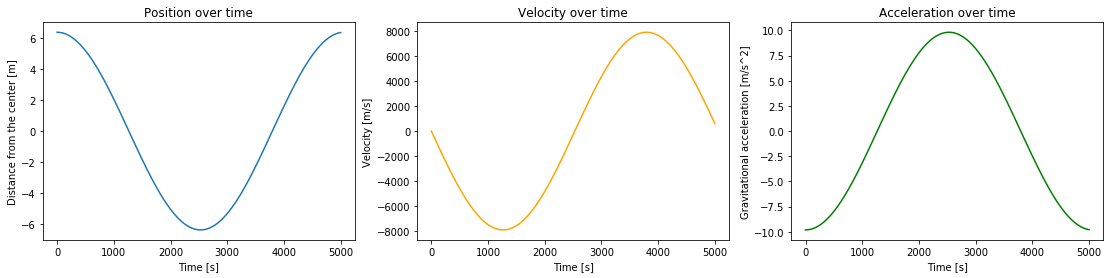

In [11]:
plt.figure(figsize=(19,4))
plt.subplot(131)
plt.plot(times, position/(10**6))
plt.title("Position over time")
plt.xlabel("Time [s]")
plt.ylabel("Distance from the center [m]")

plt.subplot(132)
plt.plot(times, velocity, color="orange")
plt.title("Velocity over time")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")

plt.subplot(133)
plt.plot(times, acceleration, color="green")
plt.title("Acceleration over time")
plt.xlabel("Time [s]")
plt.ylabel("Gravitational acceleration [m/s^2]")
plt.show()

**EXERCISE 8:**

**a)**
Find the time it takes to fall through the uniform Earth.

**b)**
Find the maximum velocity along the way.

**c)**
Comment on the results. Why do the graphs look the way they do? And specifically:
- Why are the plots for position and acceleration so similar? (look at acceleration as a function of position, and the properties of the derivative of sine waves)

In [12]:
print("It took {:.0f} seconds to fall through the Earth".format(times[np.argmin(position)]))

print("The maximum velocity was {:.0f} m/s".format(np.amax(velocity)))

It took 2531 seconds to fall through the Earth
The maximum velocity was 7910 m/s


Position and acceleration have the opposite shapes due to one being a function of the other. In the function for gravity, gravity is inversely proportional to the square of the distance from the center. In the function for the mass of the mini-Earth I need to consider, mass is proportional to the cube of the distance from the center. All in all, this becomes a relation where gravitational acceleration is proportional to the distance from the center, with some negative constant. The velocity goes from very negative to very positive during the time that the gravitational acceleration is at its highest.

The position and acceleration being linearly dependant points to them being sine waves, as the double derivative of a sine wave is the negative of the same wave(with some constants). And this also leads to the velocity being a cosine wave with only slightly different parameters.

## Falling through a non-uniform Earth

So far you have looked at a fall through a uniform Earth, but the Earth is not uniform. The core, mantle and crust have very different densities, which changes the gravity during the fall and thus the nature of the fall significantly.

This figure shows how the different layers and densities of the Earth fit together.

<img src="https://raw.githubusercontent.com/KarlHenrik/Jupyter-Book-Showroom/master/content/features/activities/FallingThroughTheEarth/RadialDensityPREM.jpg" alt="Drawing" style="width: 50%;"/>

*(taken from <a href="https://en.wikipedia.org/wiki/Structure_of_the_Earth">en.wikipedia.org/wiki/Structure_of_the_Earth</a>)*

### Implementing the  variable density of the Earth

The Preliminary Reference Earth Model is a model which gives us the density of the Earth at different distances from the center. 

The data can be found here: http://ds.iris.edu/ds/products/emc-prem/ at "Model Download". I use the file "PREM_ANISOTROPIC".

**Make sure that you have the "PREM_ANISOTROPIC.txt" file in the same folder as the notebook file, or this won't work!**

Let us read the data and store them in arrays.

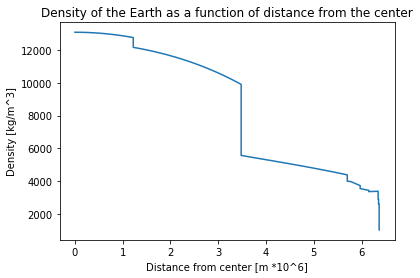

In [13]:
radiusData = np.zeros(97)
densityData = np.zeros(97)
i = 0

#The file has 97 lines starting with "[Radius] [Density]" that are read like this
infile = open("PREM_ANISOTROPIC.txt","r")
lines = infile.readlines()
for line in lines[3:]: #The data starts at line 3.
    numbers = line.split()
    radiusData[i] = float(numbers[0])
    densityData[i] = float(numbers[1])
    i += 1
infile.close()

plt.plot(radiusData/(10**6), densityData)
plt.title("Density of the Earth as a function of distance from the center")
plt.xlabel("Distance from center [m *10^6]")
plt.ylabel("Density [kg/m^3]")
plt.show()

### Mass at different heights

Next you need the total mass further in than a given distance. By working our way from the center we can add one and one "shell" to find the total mass at different distances from the center. We have to find the total mass by adding these shells due to the relatively rough resolution of our density data.

![title](https://raw.githubusercontent.com/KarlHenrik/Jupyter-Book-Showroom/master/content/features/activities/FallingThroughTheEarth/EarthShells.jpg)

Note that we use the same density for the inner and outer sphere to calculate the mass of the shell. The density we use for the spheres is the average of the Earth's density at the outer and inner radius of the shell. So that:

$$ M_{shell} = M_{outer} - M_{inner} = \frac{4}{3}\pi r_{outer}^3 Density - \frac{4}{3}\pi r_{inner}^3 Density $$

In [14]:
massData = np.zeros(97)

for i in range(1,len(radiusData)):
    shellDensity = (densityData[i-1]+densityData[i])/2 #The average of the density at the outer and inner radius
    #Finding the mass of the shells corresponding to every data point
    shellMass = 4/3*np.pi*radiusData[i]**3*shellDensity - 4/3*np.pi*radiusData[i-1]**3*shellDensity
    #Adding the next total mass to the list, adding the mass of the current shell with the previous total mass
    massData[i] = shellMass + massData[i-1]

The datapoints for density have now been turned into datapoints for total mass.

**EXERCISE 9:**
Remove the "#" from the code below to see how the old model for the total mass at different distances from the center compares to the new one from the data. Comment on the result.

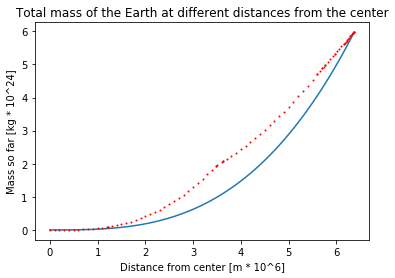

In [15]:
plt.plot(radiusData/(10**6), [sphereMass(r)/(10**24) for r in radiusData])
plt.plot(radiusData/(10**6), massData/(10**24), "ro", markersize = 1)
plt.title("Total mass of the Earth at different distances from the center")
plt.xlabel("Distance from center [m * 10^6]")
plt.ylabel("Mass so far [kg * 10^24]")
plt.show()

With the uniform Earth, the total mass increases somewhat exponentially as the total volume increases somewhat exponentially. With the non-uniform Earth, the total mass increases relatively faster in the dense core, and relatively slower in the not as dense mantle and crust.

The next step is to turn the datapoints into datapoints for the gravitational acceleration.

In [16]:
G = 6.674 * 10**(-11) #The gravitational constant
accelData = np.zeros(97)

for i in range(1,len(radiusData)):
    accelData[i] = G*massData[i]/(radiusData[i]**2)

The next step is to go from datapoints at discrete distances from the center, to a general function that gives the mass between the datapoints. This can be acheived by using the polyfit function. This function finds the polynomial of the given degree that best approximates the datapoints given.

In [17]:
import numpy.polynomial.polynomial as poly #Used later for finding a polynomial that approximates the data

turn = np.argmax(accelData) #The spike in the acceleration graph
deg = 3
coefs1 = poly.polyfit(radiusData[:turn], accelData[:turn], deg) #Polynomial for the points further in than the "spike"
coefs2 = poly.polyfit(radiusData[turn:], accelData[turn:], deg) #Polynomial for the points further out than the "spike"

earthRadius = radiusData[-1]
earthMass = massData[-1]
def realGravityAccel(pos):
    dist = abs(pos) #The absolute value of the distance
    direc = -np.sign(pos) #The direction of gravity. It is opposite of our the sign of our position

    if dist > earthRadius: #If we are outside the Earth
        return(direc*G*earthMass/pos**2) #Normal formula for acceleration using the mass of the entire Earth

    elif dist < radiusData[turn]: #If we are further in than the "spike"
        sum = 0
        for i in range(deg+1): #a0 + a1*r + a2*r**2 + a3*r**3
            sum += coefs1[i]*dist**(i)
        return(direc*sum)
    
    else: #Function 2 for distances further out than the "spike"
        sum = 0
        for i in range(deg+1):
            sum += coefs2[i]*dist**(i)
        return(direc*sum)

Here is a plot of the new function for gravity, together with the datapoints that made it.

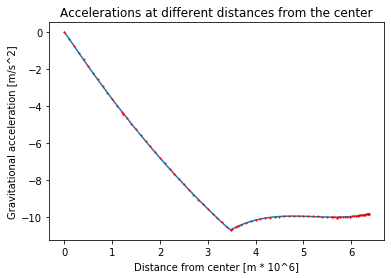

In [18]:
plt.plot(radiusData/(10**6), [realGravityAccel(r) for r in radiusData])
plt.plot(radiusData/(10**6), -accelData, "ro", markersize=1)

plt.title("Accelerations at different distances from the center")
plt.xlabel("Distance from center [m * 10^6]")
plt.ylabel("Gravitational acceleration [m/s^2]")
plt.show()

The red dots are the 97 discrete gravitational acceleration found using the datapoints from the PREM model. The blue line is a fourth degree polynomial that approximates these disctete points. The function **realGravityAccel** made the blue line, and is the function you will use later, instead of the **uniGravityAccel** function.

As you start falling, from the right of the graph, the acceleration will first stay nearly constant before increasing slightly until about 3000km. This is because, as you gets closer to the more dense inner parts of the Earth, the gravitational pull from them will increase. Since the outer layers are so much less dense than the mantle or core, you don't "lose" much gravitational pull compared to the pull you gain from being closer to the denser parts. When you are at around 3000 km, gravity starts weakening. This happens because the amount of mass pulling you down is starting to reduce fast.

## Calculating the fall through a non-uniform Earth

To calculate the movement through a non-uniform Earth, you will again need to define some paramaters and some lists or arrays to save your results in. Then you will need to use the Euler-Cromer method to calculate the movement step by step.

But before that, you need to take into account the variable density of the Earth.

**EXERCISE 10:**


**a)**
Plot the **realGravityAccel** and **uniformGravityAccel** functions together, with distances from the center to the total radius of the Earth.

**b)**
Comment on the results.

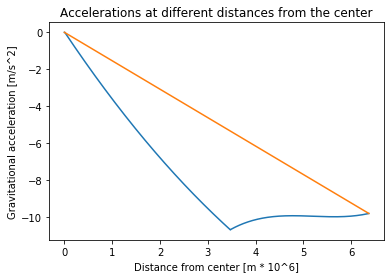

In [19]:
radiuses = np.linspace(0, earthRadius, 1000)

plt.plot(radiuses/(10**6), [realGravityAccel(r) for r in radiuses])
plt.plot(radiuses/(10**6), [uniformGravityAccel(r) for r in radiuses])

plt.title("Accelerations at different distances from the center")
plt.xlabel("Distance from center [m * 10^6]")
plt.ylabel("Gravitational acceleration [m/s^2]")
plt.show()

As discussed in exercise 8: with the uniform Earth, gravitational acceleration and distance from the center of the Earth are linearly related. Whereas with the non-uniform Earth, gravity first increases due to being closer to the very dense and masseive core, and only starts decreasing when inside the core, due to the masse above finally starting to overpower the mass below.

## The Euler-Cromer loop

**EXERCISE 11:**

**a)**
Define the lists or arrays that will hold the positions, velocities and accelerations at any given time during the fall. Use a time step of 1 second, and 5000 iterations in your loop.

**b)**
Make the starting distance from the center equal to the radius of the Earth, and make the starting velocity 0 m/s.

**c)**
Define a list or array that holds all of the different times.

In [20]:
n = 5000
dt = 1

acc = np.zeros(n)
vel = np.zeros(n)
pos = np.zeros(n)

pos[0] = earthRadius

time = np.linspace(0, n*dt, n)

**EXERCISE 12:**

Do the Euler-Cromer calculation of a fall through a uniform Earth with the initial conditions from exercise 12, and an acceleration given by the **realGravityAccel** function.

In [21]:
for i in range(n-1):
    acc[i] = realGravityAccel(pos[i])
    vel[i+1] = vel[i] + acc[i] * dt
    pos[i+1] = pos[i] + vel[i+1] * dt
acc[n-1] = realGravityAccel(pos[n-1])

**EXERCISE 13:**

Plot your results from exercise 12 (position, velocity and acceleration as a function of time).

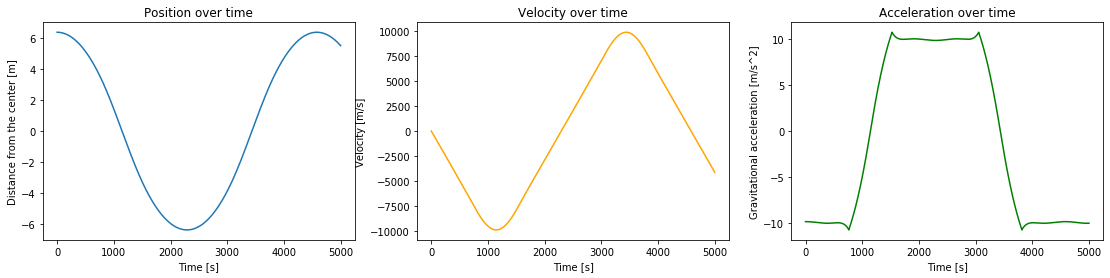

In [22]:
plt.figure(figsize=(19,4))
plt.subplot(131)
plt.plot(time, pos/(10**6))
plt.title("Position over time")
plt.xlabel("Time [s]")
plt.ylabel("Distance from the center [m]")

plt.subplot(132)
plt.plot(time, vel, color="orange")
plt.title("Velocity over time")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")

plt.subplot(133)
plt.plot(time, acc, color="green")
plt.title("Acceleration over time")
plt.xlabel("Time [s]")
plt.ylabel("Gravitational acceleration [m/s^2]")
plt.show()

**EXERCISE 14:**

**a)**
Find the time it takes to fall through the uniform Earth.

**b)**
Find the maximum velocity along the way.

**c)**
Comment on the results. Why do the graphs look the way they do? And specifically:
 - What effect does the shape of the acceleration graph have on the velocity graph?
 - What does a large acceleration lead to?
 - What does a changing acceleration lead to?

In [23]:
print("It took {:.0f} seconds to fall through the Earth".format(time[np.argmin(pos)]))

print("The maximum velocity was {:.0f} m/s".format(np.amax(vel)))

It took 2290 seconds to fall through the Earth
The maximum velocity was 9920 m/s


With nothing stopping you, you would fall all the way through the Earth and then back again, and then back again and so on. Given that gravity is a conservative force, it makes sense that you would never stop moving, but rather fall back and forth around the center.

When you reach the center (position=0), acceleration is also 0. This is when you reach your top velocity, as after this point gravity makes the speed decrease.

Gravity is almost constant close to the surface, which can also be seen here. This near constant gravity near the surface is what makes the velocity change so linearly between the sharper turns. The sharp turns of the velocity is due to gravity switching direction quickly, which happens because velocity is high while moving through the dense parts of the Earth where gravity is weak.